### Assignment 1
#### Question 5

Shyam Iyer, 190040116

PH 549: Physics of Biological Systems

In [1]:
# import statements
import random
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sc
from sklearn.linear_model import LinearRegression

from collections import deque

Defining the main random_walk function which takes into account
1. number of particles
2. time steps
3. probability w
4. number of steps to account in memory (0 to timesteps, inclusive)

In [2]:
def random_walk(particles, time, w, memory_steps):
    """
    Simulates a 1D Random walk on a lattice with or without memory
    
    :param particles: non-zero number of particles
    :type particles: int
    
    :param time: non-zero number of timesteps
    :type time: int
    
    :param w: probability of choosing a movement (0 to 1 inclusive)
    :type w: float
    
    :param memory_steps: non-zero and less than :param time: number of previous movements to include in memory
    :type memory_steps: int
    
    :return: nothing, only two subplots
    """
    if(memory_steps>time or memory_steps<0 or particles<0 or time<0 or w<0 or w>1):
        print("Invalid input!")
    else:
        trajectories = []
        x_line = range(time)
        for particles in range(particles):
            if(memory_steps>0):
                x = []
                sigma_array = []
                movement = np.random.choice([-1,1])
                sigma_array.append(movement)
                x.append(movement)
                for t in range(memory_steps - 1):
                    movement = np.random.choice(sigma_array)
                    a = np.random.random()
                    if a<w:
                        movement = movement
                    else:
                        movement = -movement
                    sigma_array.append(movement)
                    x.append(x[-1] + movement)
                if(len(sigma_array) == memory_steps):
                    sigma_deque = deque(sigma_array, memory_steps)
                else:
                    print("Sigma array is not the sufficient length!", len(sigma_array))
                for t in range(time - memory_steps):
                    a = np.random.random()
                    movement = np.random.choice(sigma_deque)
                    if a<w:
                        movement = movement
                    else:
                        movement = -movement
                    sigma_deque.append(movement)
                    x.append(x[-1] + movement)
            else:
                x = [0]
                for t in range(time):
                    x.append(x[-1] + np.random.choice([-1,1]))
                x.pop(0)
            trajectories.append(x)
        trajectories = np.array(trajectories)

        msd = [(trajectories[:, t]**2).mean() for t in range(time)]

    
#         slope, intercept, rvalue, pvalue, stderr = sc.linregress(x_line, msd)
        x_line2 = (np.array(x_line))[:,np.newaxis]
        slope,_, _, _ = np.linalg.lstsq(x_line2, msd, rcond=None)
        fit = slope*x_line

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))
        ax1.plot(x_line, trajectories[0])
        ax1.set_title("Position vs Time plot for one particle")
        ax2.plot(x_line, msd)
        ax2.plot(x_line, fit)
        ax2.set_title("Mean Squared Displacement vs Time plot")
        plt.show(fig)
        print("slope: ", slope)
        print("D = ", slope/2)

### Deviation from diffusive behaviour

For diffusive behaviour in one dimension, ${MSD} = 2Dt$ which is linear with slope $2D$ and intercept $0$

The plots have all been fitted with the linear model $y = mx$ with zero intercept

I was not able to quantify the deviation from diffusive behaviour, but I attempted the following methods:
1. Checking the deviation of fitted intercept against the model $y = mx + c$
2. Using coefficient of determination $R^2$
3. Searching for a statistical test present in a Python package which could return a p-value

#### Markovian Random Walk

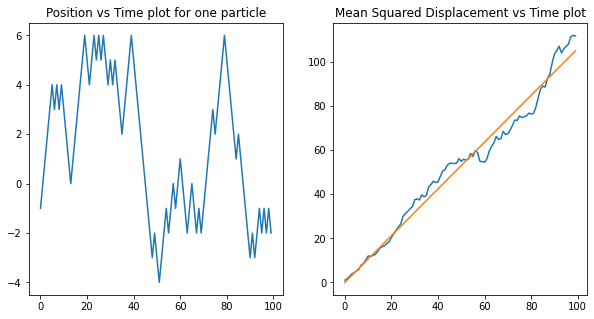

slope:  [1.06092925]
D =  [0.53046463]


In [3]:
random_walk(100, 100, 0.5, 0)

The behaviour is fairly diffusive on this timescale

From the linear fit of the MSD vs time plot we have the slope.

Using the equation of MSD, in one dimension

${MSD} = 2Dt$

From the above, we get slope = 2D

Thus the motion is diffusive with $D = \frac{Slope}{2}$


#### Random Walk with One-step memory

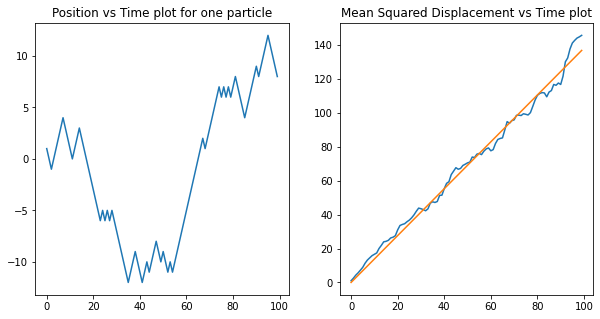

slope:  [1.38216964]
D =  [0.69108482]


In [4]:
# for w = 0.6
random_walk(100, 100, 0.6, 1)

The behaviour is fairly diffusive on this timescale

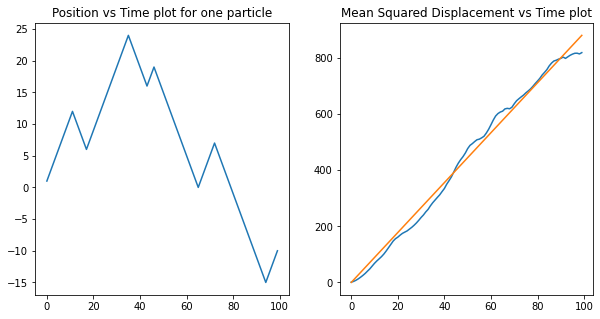

slope:  [8.89418011]
D =  [4.44709006]


In [5]:
# for w = 0.9
random_walk(100, 100, 0.9, 1)

The behaviour is fairly diffusive on this timescale

#### Random walk with 5 step memory

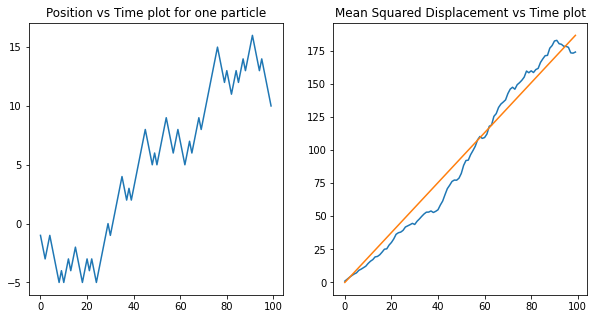

slope:  [1.88572194]
D =  [0.94286097]


In [6]:
# for w = 0.6
random_walk(100, 100, 0.6, 5)

The behaviour is subdiffusive

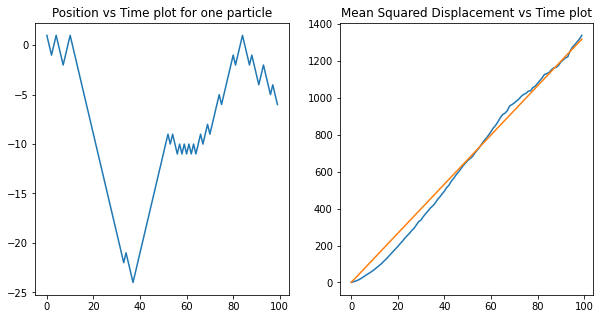

slope:  [13.31105187]
D =  [6.65552593]


In [7]:
# for w = 0.9
random_walk(100, 100, 0.9, 5)

The behaviour is subdiffusive

#### Random Walk with Full memory

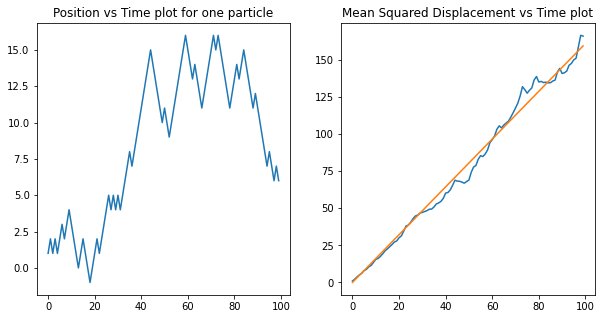

slope:  [1.61086536]
D =  [0.80543268]


In [8]:
# for w = 0.6
random_walk(100, 100, 0.6, 100)

The behaviour is fairly diffusive on this timescale

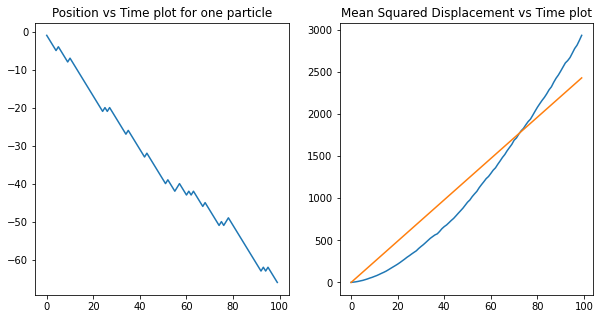

slope:  [24.51842607]
D =  [12.25921303]


In [9]:
# for w = 0.9
random_walk(100, 100, 0.9, 100)

The behaviour is subdiffusive, and not diffusive